# SKA Test Case Demo

## Installtion

Requires installation of the praetor python package

```pip install praetor```

## Generation

Add the praetor tracer to the start of your script (after imports)

```from praetor.praetor import CallTracer
import sys

tracer = CallTracer(output_directory="./output",  block_list_mod=["numpy"])
sys.setprofile(tracer)
```

- ouput_directory is where the provenance will be generated
- block_list_mod is a list of modules which will be ignored by the provenance tracker

## Transformation

Once executed, the code will now create a json directory within the output directory and two files within that: the agent file and main file.

The following command should be used to merge the two files and transform into turtle format:

```create_tt.py --main main_file_name.json --agent agent_json.json```

This will create main_file_name.ttl, which can be uploaded to the database.

## Start the database

```docker pull secoresearch/fuseki```

```docker run --rm -it -p 3030:3030 --name fuseki -e ADMIN_PASSWORD=admin -e ENABLE_DATA_WRITE=true -e ENABLE_UPDATE=true -e ENABLE_UPLOAD=true -e QUERY_TIMEOUT=60000 secoresearch/fuseki```


The database will now be available at localhost:3030

## Interacting with the Provenance

In [226]:
from praetor import prov_rdf
import io
from rdflib import Graph
from rdflib.tools.rdf2dot import rdf2dot
import pydotplus
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from datetime import datetime

In [5]:
prov_file = "./SWF-010-T1_provenance_2c314be8-7cd8-417d-990c-dfea7727c586.ttl"

In [18]:


g = Graph()
g.parse(prov_file, format="turtle")

stream = io.StringIO()
rdf2dot(g, stream)

dot_graph = pydotplus.graph_from_dot_data(stream.getvalue())
dot_graph.write_png("graph.png")  # or .write_svg(...)

True

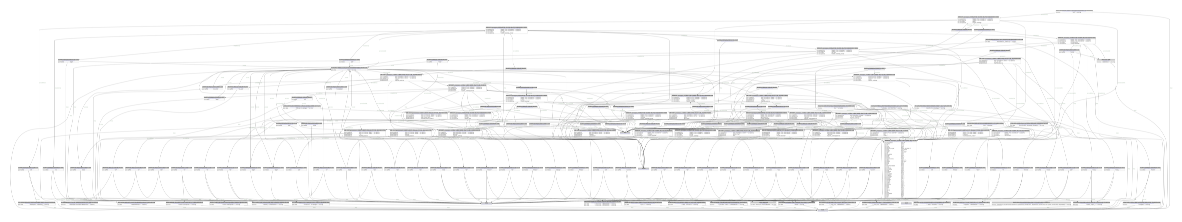

In [23]:
plt.rcParams["figure.figsize"] = (15,15)
img = mpimg.imread('graph.png')
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

In [6]:
prov_name = prov_rdf.upload_provenance(prov_file)

In [13]:
df = prov_rdf.user_defined_query(modules_query)

In [12]:
df

,modname.value,modver.value
0,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,prov:Agent
1,run:pythonVersion,3.10.18
2,https://pypi.org/project/math,None
3,https://pypi.org/project/binascii,None
4,https://pypi.org/project/cython_runtime,None
5,https://pypi.org/project/yaml,6.0.3
6,https://pypi.org/project/zlib,1.0
7,https://pypi.org/project/fcntl,None
8,https://pypi.org/project/select,None
9,https://pypi.org/project/packaging,25.0


Show all functions which happened prior to a an input being used in the pipeline

In [265]:
input_name =  "../../data//...-blanked.fits"
df = prov_rdf.track_function(prov_name, input_name=input_name)

Show the reverse : all functions which happened after an input was used in the pipeline

In [ ]:
input_name =  "../../data//...-blanked.fits"
df = prov_rdf.track_function(prov_name, input_name=input_name, trace_back=False)

Show all functions which executed prior to an output being produced

In [162]:
output_name = "FileFinder(/...ite-packages)"
df = prov_rdf.track_function(prov_name, output_name=output_name)

Show all function executions after a specified one:

In [ ]:
func_id="urn_uuid:SWF-010-T1_provenance_2c314be8-7cd8-417d-990c-dfea7727c586_140203633149968"
df = prov_rdf.track_function(prov_name, function_id=func_id)